# N1 Health Take-Home Data Challenge

N1 Health’s client, a national Medicare Advantage plan, is seeking to understand how best to use its resources to address food access challenges in its membership. N1 Health has been tasked with presenting a short analysis (~5-10 minutes) of publicly available data to the Chief Medical Officer to answer this question. The guiding questions are:
- Where should we deploy a food access program?
- How many people will be included? How many might be successfully engaged?
- Which subgroup of the population might benefit the most from the program?
- What is the projected impact of this program? 


### Set-up

In [ ]:
# Install sodapy to establish API connection with CDC data according to CDC API documentation
#%pip -q install sodapy

In [ ]:
#pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sodapy import Socrata
import warnings

warnings.filterwarnings('ignore')

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")

pandas version: 2.3.0
numpy version: 2.3.1


### CDC - 500 cities data

Time lag: the 2019 release is based on earlier years of data, e.g. 2016. So may not represent very recent changes.

CDC data presents 27 measures at the census tract level. \
Potential measures that may be strongly related to food access challenges are:
* BPHIGH_CrudePrev (pct adults with High BP)
* DIABETES_CrudePrev (pct adults with diagnosed diabetes)
* HIGHCHOL_CrudePrev (pct adults with high chol)
* OBESITY_CrudePrev (pct adults who are obese)
* CHD_CrudePrev (pct adults with diagnosed coronary heart disease)


Potential measures that may be indirectly related to food access challenges:
* PHLTH_CrudePrev (pct adults who do not have good physical health)

We can use this dataset to:
* Identify vulnerable populations in areas with LA challenges.
* Find areas that may be most clinically impacted by food access challenges.   

In [2]:
# Call to CDC 500 cities: census Tract-level Data API. 
# Using suggested syntax from API documentation: https://dev.socrata.com/foundry/chronicdata.cdc.gov/k86t-wghb

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("chronicdata.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(chronicdata.cdc.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

results = client.get("k86t-wghb", limit=30000)

# Convert to pandas DataFrame
five_hundred_cities_df = pd.DataFrame.from_records(results)

five_hundred_cities_df.shape

(27210, 63)

In [3]:
five_hundred_cities_df.sample(10)

,stateabbr,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,...,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
2791,CA,Huntington Beach,0636000,06059099311,0636000-06059099311,3598,6.5,"( 5.3, 7.8)",14.2,"(13.3, 15.1)",...,"(84.0, 87.8)",7.7,"( 6.8, 8.7)",29.6,"(28.1, 31.1)",1.6,"( 1.5, 1.9)",5.2,"( 3.1, 7.8)","(33.66104041670, -118.002828739)"
16050,NM,Albuquerque,3502000,35001000127,3502000-35001000127,2801,13.0,"(11.1, 15.0)",25.7,"(24.7, 26.6)",...,"(81.2, 85.1)",12.8,"(11.7, 14.0)",32.0,"(30.9, 33.0)",2.8,"( 2.5, 3.1)",12.4,"( 8.9, 16.1)","(35.09800124900, -106.523879558)"
3564,CA,Los Angeles,0644000,06037195710,0644000-06037195710,4328,23.3,"(19.9, 26.5)",15.9,"(15.3, 16.5)",...,"(82.5, 85.5)",14.9,"(13.7, 16.1)",38.7,"(37.5, 39.8)",3.1,"( 2.9, 3.3)",15.8,"(12.4, 19.2)","(34.07472919090, -118.268602362)"
4254,CA,Moreno Valley,0649270,06065042408,0649270-06065042408,3152,17.0,"(14.5, 19.6)",20.2,"(19.5, 20.9)",...,"(82.3, 85.6)",13.2,"(12.2, 14.2)",40.0,"(38.8, 41.1)",2.8,"( 2.6, 3.0)",15.4,"(11.7, 19.3)","(33.95427985320, -117.230975611)"
2307,CA,Escondido,0622804,06073020705,0622804-06073020705,3213,12.4,"(10.5, 14.5)",19.6,"(18.7, 20.4)",...,"(84.4, 87.7)",11.5,"(10.5, 12.6)",32.2,"(31.1, 33.3)",2.5,"( 2.3, 2.8)",9.5,"( 6.3, 13.5)","(33.12175526110, -117.054288350)"
24325,TX,Houston,4835000,48201450900,4835000-48201450900,2434,14.8,"(13.1, 16.6)",20.3,"(19.3, 21.3)",...,"(81.2, 85.0)",8.8,"( 8.0, 9.7)",30.1,"(28.8, 31.3)",2.4,"( 2.1, 2.6)",7.2,"( 4.4, 11.5)","(29.74212120520, -95.5649411122)"
8867,FL,Port St. Lucie,1258715,12111382108,1258715-12111382108,20218,19.8,"(17.3, 22.5)",31.3,"(29.6, 32.8)",...,"(81.5, 86.0)",15.0,"(13.3, 16.9)",33.8,"(32.5, 35.0)",4.6,"( 4.1, 5.3)",13.2,"( 8.7, 18.7)","(27.32964157840, -80.3938089889)"
17855,NY,New York,3651000,36081015900,3651000-36081015900,4136,14.0,"(12.6, 15.5)",17.3,"(16.7, 17.8)",...,"(80.0, 82.7)",11.2,"(10.4, 12.0)",38.4,"(37.5, 39.2)",2.3,"( 2.1, 2.5)",14.2,"(10.8, 18.3)","(40.75578691090, -73.9183424801)"
9100,FL,Tampa,1271000,12057007102,1271000-12057007102,2386,17.5,"(15.0, 20.5)",13.5,"(12.8, 14.1)",...,"(79.1, 83.8)",8.3,"( 7.5, 9.3)",33.6,"(32.2, 35.1)",1.5,"( 1.3, 1.6)",10.6,"( 7.1, 16.3)","(27.88355350880, -82.5329173965)"
6836,CO,Aurora,0804000,08005082100,0804000-08005082100,6750,17.6,"(15.3, 20.0)",18.7,"(17.9, 19.4)",...,"(79.7, 83.6)",11.1,"(10.2, 12.1)",32.5,"(31.4, 33.5)",2.4,"( 2.2, 2.6)",12.9,"( 9.0, 17.0)","(39.70203736290, -104.800825711)"


### FDA - 2025 Food Environment Atlas Data

2025 Food Environment Atlas Data contains data for what members of a population in each listed county are experiencing food access challenges. Low Access to store indicates the number of people in a county who are living more than 1 mile from a store in an urban area and more than 10 miles from a store in a rural area. *Counts are not whole numbers because they may be an average of survey results or an estimate based of grid cells for the county.

We can use this dataset to:
* Identify which counties are in need food access program based on high rates of LA or trending to LA
* __High impact areas would be counties with high population and high percentage of LA individuals. Focus on areas that also have high number of vulnerable population (children, elderly) and also areas that are trending upwards on LA (% change).__

Detailed explanation for each indicator in the ACCESS category\
https://www.ers.usda.gov/data-products/food-environment-atlas/documentation#access

In [4]:
# Load the variable list data from csv
path1 = "2025-food-environment-atlas-data/VariableList.csv"
variable_list_df = pd.read_csv(path1)

# Create a list of all variable related to Access
access_code_list = variable_list_df[variable_list_df.Category_Code == "ACCESS"].Variable_Code.to_list()

variable_list_df.shape

(304, 6)

In [5]:
# Load the food environment atlas data from csv
path2 = "2025-food-environment-atlas-data/StateAndCountyData.csv"
food_environment_atlas_df = pd.read_csv(path2)

# Filter data for all rows that related to Access category using the variable codes
access_df_long = food_environment_atlas_df[food_environment_atlas_df.Variable_Code.isin(access_code_list)]

# Reshape the dataframe to wide
access_df = access_df_long.pivot(index= ["FIPS","State","County"], columns = "Variable_Code", values="Value").reset_index()
access_df.columns.name = None

access_df.sample(10)

,FIPS,State,County,LACCESS_AIAN15,LACCESS_AIAN19,LACCESS_ASIAN15,LACCESS_ASIAN19,LACCESS_BLACK15,LACCESS_BLACK19,LACCESS_CHILD15,...,PCT_LACCESS_MULTIR15,PCT_LACCESS_MULTIR19,PCT_LACCESS_POP15,PCT_LACCESS_POP19,PCT_LACCESS_SENIORS15,PCT_LACCESS_SENIORS19,PCT_LACCESS_SNAP15,PCT_LACCESS_SNAP19,PCT_LACCESS_WHITE15,PCT_LACCESS_WHITE19
434,13093.0,GA,Dooly,9.700836,9.700836,79.528881,77.545953,3877.537797,3806.018209,1700.396516,...,48.493114,48.722294,51.499226,50.570053,67.101692,65.766624,15.877126,16.793274,79.771812,78.873337
2923,51580.0,VA,Covington,1.050013,1.050013,2.000000,2.000000,95.420184,96.743162,336.283043,...,29.509367,29.735695,24.468674,24.642918,23.425646,23.575712,3.115411,4.336534,26.249271,26.423313
1495,29021.0,MO,Buchanan,120.483003,173.199239,283.455073,319.388910,1064.866939,1475.741785,7410.322881,...,25.362793,40.551289,23.696180,32.594467,38.119865,43.749332,5.164935,5.669721,37.363091,47.142361
944,20109.0,KS,Logan,1.000000,1.000000,2.000000,2.000000,12.291258,12.291258,182.522320,...,34.859016,34.859016,18.235102,18.235102,21.602781,21.602781,1.813638,2.049900,26.712627,26.712627
267,8041.0,CO,El Paso,2204.343126,1962.878021,7125.715785,6307.579954,15172.864200,12706.085230,70228.815370,...,36.560158,30.668737,31.767765,28.518538,35.062634,33.980972,2.806278,2.130416,42.519333,40.162930
228,6081.0,CA,San Mateo,246.518094,285.300785,14071.150050,14029.331220,761.256789,793.097110,17898.857450,...,5.866127,6.301496,9.857196,10.517214,13.173060,14.056102,0.113134,0.147401,15.011065,16.080496
245,6115.0,CA,Yuba,984.129322,1029.683069,2250.298366,2607.142482,1140.956744,1283.491787,11464.743690,...,51.710464,55.269611,17.697647,21.463261,56.180573,60.087185,6.438440,7.137890,57.007935,61.056080
272,8051.0,CO,Gunnison,63.169326,63.169326,41.663286,41.663286,8.993860,8.993860,1568.158870,...,27.336880,27.336880,9.776000,9.776000,59.340988,59.340988,1.393381,2.821659,51.867924,51.867924
1656,31001.0,NE,Adams,43.568217,43.568217,183.386710,183.386710,81.339337,81.339337,3638.972595,...,43.059887,43.059887,35.024395,35.024395,57.003368,57.003368,4.511719,4.721869,48.593433,48.593433
1534,29099.0,MO,Jefferson,459.258011,453.790462,795.447512,810.093751,849.495910,841.972053,35700.919430,...,61.387638,61.111774,31.069220,31.030544,62.663990,61.839508,7.736037,7.066758,65.258232,64.910225


In [6]:
access_df.shape

(3144, 68)

### Data Processessing

We want to clean the datasets to merge on a field. We can extrapolate the county FIPS code from the CDC data. All cities in the dataset will be grouped and an average for each measure will be used for analysis. Population2010 is sumed for each city in the county.

In [7]:
# Create FIPS field for 500 Cities data to match county FIPS in FDA data
five_hundred_cities_df["FIPS"] = five_hundred_cities_df["tractfips"].str[:5]

# Identify key measures in CDC data and convert to numeric type. Set non-numbers to nan.
measures = ["bphigh_crudeprev","chd_crudeprev","highchol_crudeprev","diabetes_crudeprev","obesity_crudeprev","population2010"]
five_hundred_cities_df[measures] = five_hundred_cities_df[measures].apply(pd.to_numeric, errors="coerce")

# Aggregate data based on County FIPS
clean_five_hundred_cities_df = (five_hundred_cities_df.groupby("FIPS").agg(
    {"bphigh_crudeprev": "mean",
        "chd_crudeprev": "mean",
        "highchol_crudeprev": "mean",
        "diabetes_crudeprev": "mean",
        "obesity_crudeprev": "mean",
        "population2010": "sum"})
    .reset_index())

In [8]:
# Change dtype of FIPS column. Add leading zero if less than 5 digits
access_df["FIPS"] = access_df["FIPS"].astype("int").astype("str").str.zfill(5)

### Merge Datasets

Notes: Significant number of counties will not have the CDC health data

In [9]:
merged_df = access_df.merge(clean_five_hundred_cities_df, how = "left", on = "FIPS")

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS                       3144 non-null   object 
 1   State                      3144 non-null   object 
 2   County                     3144 non-null   object 
 3   LACCESS_AIAN15             3144 non-null   float64
 4   LACCESS_AIAN19             3144 non-null   float64
 5   LACCESS_ASIAN15            3144 non-null   float64
 6   LACCESS_ASIAN19            3144 non-null   float64
 7   LACCESS_BLACK15            3144 non-null   float64
 8   LACCESS_BLACK19            3144 non-null   float64
 9   LACCESS_CHILD15            3144 non-null   float64
 10  LACCESS_CHILD19            3144 non-null   float64
 11  LACCESS_HHNV15             3144 non-null   float64
 12  LACCESS_HHNV19             3144 non-null   float64
 13  LACCESS_HISP15             3144 non-null   float

## Data Analysis - Ranking

A ranking system will be created for areas with the highest populations of Low Access individuals. This will give us insight into which counties to target for the food access program.

We are assuming the client is focusing on immediate impact for the most people and wants to place higher priority on areas with a large population impacted by Food Access Challenges.

In [10]:
# Create a ranking based on key metrics (total and pct) in the access data:
# Total Pop, Total Pop Trend, Children, Seniors, Low Income, No car, Health metrics
key_fields_list = ['LACCESS_POP19', 
                   'PCH_LACCESS_POP_15_19', 
                   'PCT_LACCESS_POP19', 
                   'LACCESS_LOWI19', 
                   'PCT_LACCESS_LOWI19',
                   'LACCESS_HHNV19',
                   'PCT_LACCESS_HHNV19',
                   'LACCESS_CHILD19',
                   'PCT_LACCESS_CHILD19',
                   'LACCESS_SENIORS19',
                   'PCT_LACCESS_SENIORS_15_19',
                   'bphigh_crudeprev',
                   'chd_crudeprev',
                   'highchol_crudeprev',
                   'diabetes_crudeprev',
                   'obesity_crudeprev',]
                   
# For simplicity I will only use LACCESS metric and obesity to determine which counties are most in need of a food access program.
## We can use each of these vulnerable population metrics to weigh the ranking and further explore which areas may need a assistance 

# Key field and weight for rank.
key_fields_simple = {'LACCESS_POP19' : 0.6, 
                     'PCT_LACCESS_POP19' : 0.1,
                     'PCH_LACCESS_POP_15_19' : 0.1,
                     'obesity_crudeprev' : 0.2}

# Fill nan values of obesity crude prev with average obesity rate in the dataset for analysis
merged_df["obesity_crudeprev"] = merged_df["obesity_crudeprev"].fillna(merged_df["obesity_crudeprev"].mean())

# Create ranks within each of the key fields
counties_ranked = merged_df[(["FIPS","State","County"] + list(key_fields_simple.keys()))]
counties_ranked["LA_rank"] = counties_ranked["LACCESS_POP19"].rank(ascending=False, method="dense")
counties_ranked["PCT_LA_rank"] = counties_ranked["PCT_LACCESS_POP19"].rank(ascending=False, method="dense")
counties_ranked["TREND_LA_rank"] = counties_ranked["PCH_LACCESS_POP_15_19"].rank(ascending=False, method="dense")
counties_ranked["obesity_rank"] = counties_ranked["obesity_crudeprev"].rank(ascending=False, method="dense")

# Create a weighted ranking for each county to prioritize efforts based on multiple factors
counties_ranked["weighted_rank"] = (counties_ranked["LA_rank"]*key_fields_simple["LACCESS_POP19"] +\
                                 counties_ranked["PCT_LA_rank"]*key_fields_simple["PCT_LACCESS_POP19"] +\
                                 counties_ranked["TREND_LA_rank"]*key_fields_simple["PCH_LACCESS_POP_15_19"] +\
                                 counties_ranked["obesity_rank"]*key_fields_simple["obesity_crudeprev"]\
                                 ).rank(ascending=True, method="dense")   


In [15]:
# Change rank fields to int for readability 
counties_ranked = counties_ranked.astype({"LA_rank": int,
                                          "PCT_LA_rank": int,
                                          "TREND_LA_rank": int,
                                          "obesity_rank": int,
                                          "weighted_rank": int,})

counties_ranked.sort_values(by="weighted_rank",ascending = True).head(20)

,FIPS,State,County,LACCESS_POP19,PCT_LACCESS_POP19,PCH_LACCESS_POP_15_19,obesity_crudeprev,LA_rank,PCT_LA_rank,TREND_LA_rank,obesity_rank,weighted_rank
695,17197,IL,Will,301285.88000,44.466301,8.912761,35.047222,20,254,705,100,1
2357,45079,SC,Richland,178754.68270,46.489681,21.601006,34.478333,73,213,409,114,2
747,18097,IN,Marion,294165.31330,32.562275,21.168152,36.763551,21,736,414,66,3
1857,36055,NY,Monroe,252370.55260,33.905098,7.745804,38.359494,38,637,728,44,4
455,13135,GA,Gwinnett,312921.01620,38.856682,4.594998,32.249622,18,405,872,170,5
1790,34029,NJ,Ocean,251642.99020,43.645058,4.060647,32.249622,39,266,908,170,6
743,18089,IN,Lake,170674.45000,34.409824,10.067019,45.994000,81,599,660,2,7
2254,42017,PA,Bucks,216360.87230,34.603954,11.891454,32.249622,57,581,604,170,8
509,13245,GA,Richmond,95414.34419,47.576576,14.064563,38.902128,178,193,539,34,9
2053,39017,OH,Butler,157040.79650,42.659061,8.071832,32.249622,96,286,720,170,10


In [30]:
# Create a separate data table for top ranked counties we want to focus on
priority_areas = counties_ranked.sort_values(by="weighted_rank",ascending = True).head(10).reset_index()

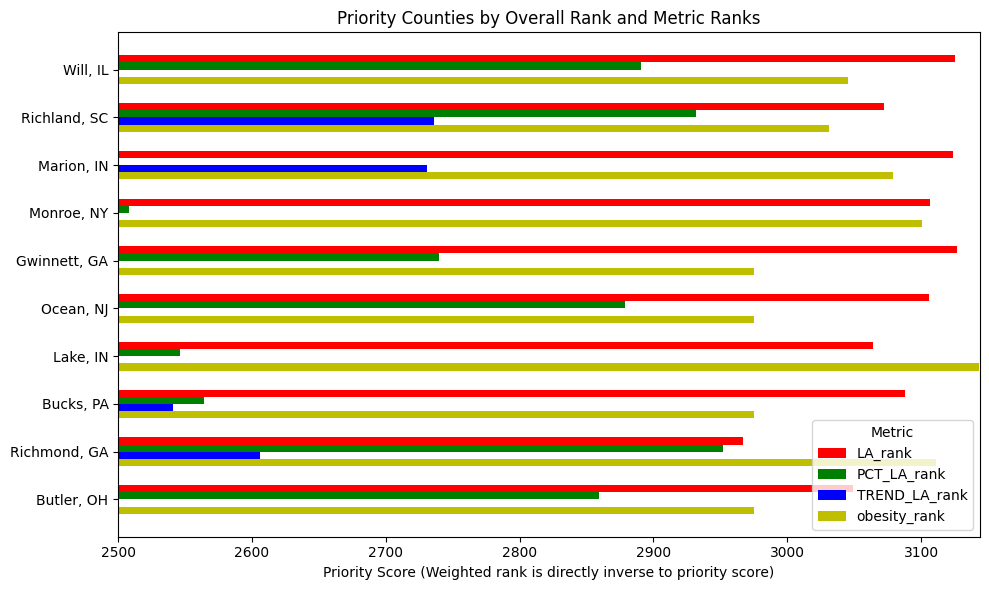

In [83]:
## Create a plot to compare rankings for top 10 priority counties

# Convert priority counties to list to create labels
counties = priority_areas.County.tolist()
states = priority_areas.State.tolist()
county_state = [f"{c}, {s}" for c, s in zip(counties, states)]

y = np.arange(len(counties))

bar_height = 0.15
metrics = ["LA_rank", "PCT_LA_rank", "TREND_LA_rank", "obesity_rank"]
offsets = np.linspace(-1.5*bar_height, 1.5*bar_height, len(metrics))
colors = ['r','g','b','y']

# "Invert" ranking into a score to make visual more intuitive
max_rank = 3144 # Max rank - number of counties represented
plot_data = priority_areas.copy()
for metric in metrics:
    plot_data[metric+"_score"] = max_rank - plot_data[metric] + 1

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric column directly
for i, metric in enumerate(metrics):
    ax.barh(y + offsets[i], plot_data[metric+"_score"], height=bar_height, label=metric, color=colors[i]
    )

# Plot Format
ax.set_yticks(y)
ax.set_yticklabels(county_state)
ax.invert_yaxis()  #rank 1 is on top
ax.set_xlabel("Priority Score (Weighted rank is directly inverse to priority score)")
ax.set_xlim(2500, 3144)  # show only up to score = 500
ax.set_title("Priority Counties by Overall Rank and Metric Ranks")
ax.legend(title="Metric")

plt.tight_layout()
plt.show()


### __Where should we deploy a food access program?__

Based on the weighted ranking system I established, I have identified the top 10 counties that may be most in need of a food access program. This ranking is based primarily on areas have the highest population of individuals that have food access challenges, with additional weights on the percentage of LA to the total population, LA trend from 2015 to 2019, and obesity rates in that county. Looking at the priority areas, it seems like most of the highly impacted counties are in the midewest and the east coast. For a broader approach, Medicare Advantage could try to target larger geographic areas in these locations. For the sake of simplicity, I will utilize these individual counties to guide the following predictions of clinical results.

_We can improve this analysis in the following ways:_
* Add more health or demographic metrics to the ranking system with weights to indentify populations that may be at higher risk.
* Planning on an individual county level might be impratical. As an improvement to this analysis, we can bucket the counties into larger geographic units and perform the analysis with that data. The strategy works better here because it may be more effective to launch a program in a specific area at first instead of spread out pockets that need assistance.
* We can create a Choropleth map to better visualize which regions are in need. Specific regions on the map can be identified based on where the most activity is seen. 
* This data represents total individuals in each county and not number of plan members in each county. So the strategy might change depending on where the client has high membership and innetwork health providers etc.  

In [44]:
# Find total low access population for top 10 priority counties 
outreach_total = priority_areas.LACCESS_POP19.sum() * 0.5

print(f"The target population number for an food access program is {int(outreach_total)} people")

# Estimate an engagement rate by averaging the rates of 2 common food access programs
engagement_total = outreach_total * (0.82+0.512)/2
print(f"The projected engagement for planned food access programs is {int(engagement_total)} people")

The target population number for an food access program is 1115315 people
The projected engagement for planned food access programs is 742800 people


### __How many people will be included? How many might be successfully engaged?__

Using 2019 data to estimate population and percentages. Assume we plan to launch a program in the top 10 counties in this table and assuming we can include 50% of all households in low access areas for initial outreach.

To estimate how many people might be successfully engaged we can take success rates of other Food Access programs:
* WIC in 2021 - 51.2% participation in all individuals eligible \
https://www.fns.usda.gov/research/wic/eligibility-and-program-reach-estimates-2021#:~:text=Figure%201.,breastfeeding%20women%20(77%20percent).
* SNAP in 2019 - 82% participation in all individuals elibible \
https://www.apha.org/getcontentasset/6f04791d-d297-4bfb-a03d-f1b32b822648/7ca0dc9d-611d-46e2-9fd3-26a4c03ddcbb/food_access_programs_report.pdf?language=en

__The target population number for an food access program is 1115315 people__ \
__The projected engagement for planned food access programs is 742800 people__

_We can improve this analysis in the following ways:_
* If we have access to the data we can specifically target households that are currently not receiving any Food Access Assistance (Not receiving SNAP and also low access to foodstore)
* We can more accurate estimate the engagement rate and number by including specific subgroups of the population and matching specific target programs. (Ex: deploying WIC to areas with more children that are exposed to LA)

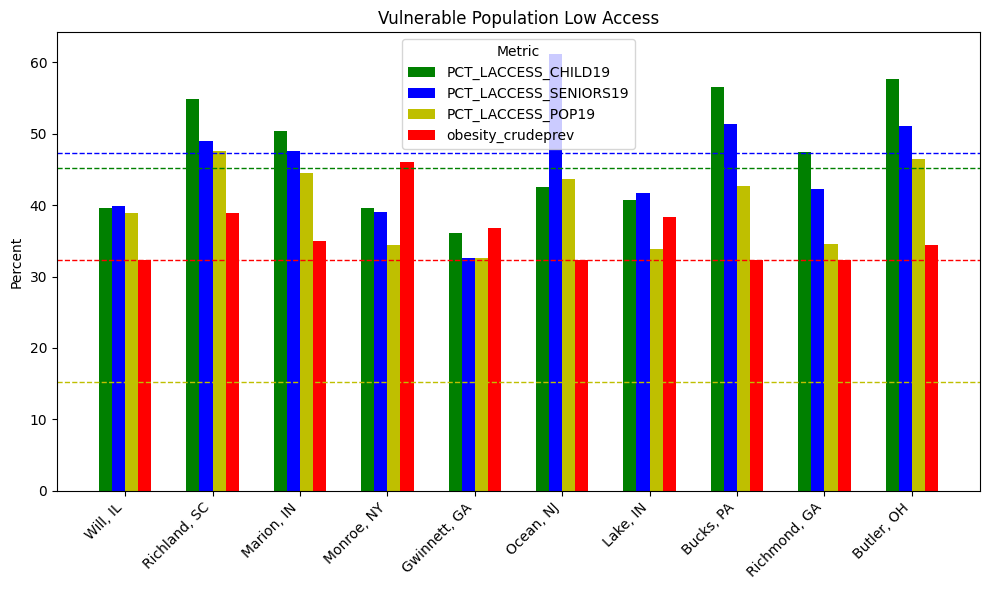

In [66]:
## Create a plot to compare the LA percentages for vulnerable demographic populations
priority_FIPS = priority_areas.FIPS.tolist()

plot_data2 = merged_df[merged_df.FIPS.isin(priority_FIPS)]

x = np.arange(len(counties))

bar_width = 0.15
metrics2 = ["PCT_LACCESS_CHILD19", "PCT_LACCESS_SENIORS19", "PCT_LACCESS_POP19","obesity_crudeprev"]
offsets = np.linspace(-1.5*bar_width, 1.5*bar_width, len(metrics2))
colors = ['g','b','y','r']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric column directly
for i, metric in enumerate(metrics2):
    ax.bar(x + offsets[i], plot_data2[metric], width=bar_width, label=metric, color=colors[i]
    )

# Plot Format
ax.set_xticks(x)
plt.xticks(rotation=45, ha="right")
ax.set_xticklabels(county_state)
ax.set_ylabel("Percent")
ax.set_title("Vulnerable Population Low Access")
ax.legend(title="Metric")

# Add visuals to represent average values
for i, metric in enumerate(metrics2):
    ax.axhline(y=merged_df[metric].mean(), color=colors[i], linestyle="--", linewidth=1, label = f"Avg {metric}")

plt.tight_layout()
plt.show()

### __Which subgroup of the population might benefit the most from the program?__

The way the analysis is currently set up, I put a priority to target the highest total population of individuals impacted by food access challenges with a slight weight on the percentage of the population that is effected by obesity. Obesity was chosen for this analysis because it may be a indicator of overall health levels and is a cause for many other health complications. Since obesity rates play a large role in which areas got chosen for outreach, individuals that are obese are the subgroup that may be most affected by this planned program.

While the overall percent of LA individuals in our target areas are high, the percentage of vulnerable demographic groups (seniors, children) is not consistant accross these regions. In some counties there are a disproportionate amount of seniors or children experiencing food access challenges, which may indicate an alterate program is required within these regions. 

_We can improve this analysis in the following ways:_
* We can change the focus of the analysis which will have an effect on the overall weighted ranking. For example, if the client plans to launch a program directed to helping children (WIC, SBP, SNLP), I would likely want to perform a separate analysis that includes the LACCESS_CHILD19 metric in the ranking with greater weighting.  

In [80]:
# Projected overall engagement rate
projected_engagement = (0.82+0.512)/2.0
print(f"Projected overall engagement percentage of outreach programs is {round(projected_engagement*100,2)}%")

# Projected % decrease for LA population in target area
LA_reduction = 0.5 * projected_engagement
print(f"Projected reduction of low access population in target areas is {round(LA_reduction*100,2)}%")

# Total LA population for 2019
total_LApop = access_df.LACCESS_POP19.sum()
print(f"The 2019 total low access population is {int(total_LApop)}") 

# Projected total percentage decrease in dataset LA population
total_LA_reduction = priority_areas.LACCESS_POP19.sum() * LA_reduction
print(f"Program is projected to reduce the number of low food access individuals by {int(total_LA_reduction)}")

total_pct_decrease = total_LA_reduction/total_LApop
print(f"A {round(LA_reduction*100,2)}%  decrease in target areas will result in a {round(total_pct_decrease*100,2)}% total low access population reduction.")

Projected overall engagement percentage of outreach programs is 66.6%
Projected reduction of low access population in target areas is 33.3%
The 2019 total low access population is 68579764
Program is projected to reduce the number of low food access individuals by 742800
A 33.3%  decrease in target areas will result in a 1.08% total low access population reduction.


### __What is the projected impact of this program?__

The overall engagement percentage derived off known success rates for other programs is 0.67%. If the target population for outreach is 50% of the Low Access Population, then we can predict a total low access population reduction of __33%__.

A 33% reduction in the low access population in these target areas will lead to a low access population reduction across the whole dataset of __1.08%__. Greater reductions can be achieved by targeting higher effected areas or by increasing the scope of the outreach.

Other measureable impacts include improved health outcomes and clinical records for people engaged in the program. Greater access to foodstores and food security leads to potentially healthier food options and better health outcomes as a result. Less members will require medical care related to poor physical health.